# Preprocessing of QC measures

## Cohorts
- MNI ET/NC, PPMI NC, ADNI2 NC

## Criterias
-  All QC scores (freesurfer, suit, maget) >=2

## Input
    MNI QC results:  ../tab_data/qc/mni_qc.csv
    
    PPMI QC results: ../tab_data/qc/ppmi_qc.csv
    
    ADNI QC results: ../tab_data/qc/adni_qc.csv
    
    Previous preproc results: ../tab_data/ADNI-PPMI_Des-cere_preped.csv
    
    Previous preproc results: ../tab_data/MNI_Des-cere_preped.csv

## Output 
    Output1: ../tab_data/all_Des-cere_preped_qcInfo.csv # Results with qc info.
    Output2: ../tab_data/all_Des-cere_preped_qcPass.csv # Results which passed QC.
    Output1: ../tab_data/all_DKT-cere_preped_qcInfo.csv # Results with qc info.
    Output2: ../tab_data/all_DKT-cere_preped_qcPass.csv # Results which passed QC.

In [1]:
## Preprocessing of ADNI and PPMI dataset freesurfer outputs
#lib and path
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
data_dir = Path("/codes/tab_data")
adni_qc_file = data_dir/'qc'/'adni_qc.csv'; 
ppmi_qc_file = data_dir/'qc'/'ppmi_qc.csv';
mni_qc_file  = data_dir/'qc'/'mni_qc.csv';

adni_qc_df = pd.read_csv(adni_qc_file , sep=',', header=0, index_col=0);
ppmi_qc_df = pd.read_csv(ppmi_qc_file , sep=',', header=0, index_col=0);
mni_qc_df = pd.read_csv(mni_qc_file , sep=',', header=0, index_col=0);
adni_qc_df.index = [x.replace('-','_') for x in adni_qc_df.index];
ppmi_qc_df.index = [x.replace('-','_') for x in ppmi_qc_df.index];
mni_qc_df.index  = [x.replace('-','_') for x in mni_qc_df.index];

# previous preproc results:
mni_preproc_file = data_dir/'MNI_Des-cere_preped.csv'
other_preproc_file = data_dir/'ADNI-PPMI_Des-cere_preped.csv'
mni_data_df = pd.read_csv(mni_preproc_file , sep=',', header=0, index_col=0);
other_data_df = pd.read_csv(other_preproc_file , sep=',', header=0, index_col=0);

mni_preproc_dkt_file = data_dir/'MNI_DKT-cere_preped.csv'
other_preproc_dkt_file = data_dir/'ADNI-PPMI_DKT-cere_preped.csv'
mni_data_dkt_df = pd.read_csv(mni_preproc_dkt_file , sep=',', header=0, index_col=0);
other_data_dkt_df = pd.read_csv(other_preproc_dkt_file , sep=',', header=0, index_col=0);

# Current results:
#'Destrieux' 2009a atlas
qcinfo_file = data_dir/'all_Des-cere_preped_qcInfo.csv'
qced_file   = data_dir/'all_Des-cere_preped_qcPass.csv'
# DKT atlas
qcinfo_dkt_file = data_dir/'all_DKT-cere_preped_qcInfo.csv'
qced_dkt_file   = data_dir/'all_DKT-cere_preped_qcPass.csv'

In [2]:
## threshold by QC results, criterias: all QC scores >=2
qc_th=2
#'Destrieux' 2009a atlas
mni_data_df=mni_data_df.join(mni_qc_df, how='left');
other_data_df=other_data_df.join(pd.concat([adni_qc_df, ppmi_qc_df]), how='left');
all_data_df=pd.concat([mni_data_df, other_data_df])
all_data_qc_df=all_data_df[(all_data_df['freesurfer_score']>=qc_th)&(all_data_df['suit_score']>=qc_th)&(all_data_df['maget_score']>=qc_th)]
# DKT atlas
mni_data_dkt_df=mni_data_dkt_df.join(mni_qc_df, how='left');
other_data_dkt_df=other_data_dkt_df.join(pd.concat([adni_qc_df, ppmi_qc_df]), how='left');
all_data_dkt_df=pd.concat([mni_data_dkt_df, other_data_dkt_df])
all_data_dkt_qc_df=all_data_dkt_df[(all_data_dkt_df['freesurfer_score']>=qc_th)&(all_data_dkt_df['suit_score']>=qc_th)&(all_data_dkt_df['maget_score']>=qc_th)]

In [3]:
# print qc results statistics
group_names = all_data_df.group.unique()
print('Destrieux Original number / QC pass number')
for x_ in group_names:
    print(x_, ':',all_data_df[all_data_df['group']==x_].shape[0],'/',
          all_data_qc_df[all_data_qc_df['group']==x_].shape[0])
    
print('DKT Original number / QC pass number')
for x_ in group_names:
    print(x_, ':', all_data_dkt_df[all_data_dkt_df['group']==x_].shape[0],'/',
          all_data_dkt_qc_df[all_data_dkt_qc_df['group']==x_].shape[0])

Destrieux Original number / QC pass number
ET : 38 / 34
NC : 32 / 29
ADNI : 309 / 223
PPMI : 116 / 78
DKT Original number / QC pass number
ET : 38 / 34
NC : 32 / 29
ADNI : 309 / 223
PPMI : 116 / 78


In [4]:
# create new columns
def creat_cols_(df):
    # create new cerebellum cols
    df.loc[:,'Cerebellum_White_Matter']=df.loc[:,'Left_Cerebellum_White_Matter']+df.loc[:,'Right_Cerebellum_White_Matter'];
    df.loc[:,'Cerebellum_Cortex']=df.loc[:,'Left_Cerebellum_Cortex']+df.loc[:,'Right_Cerebellum_Cortex'];
    df.loc[:,'cerebellumVol']=df.loc[:,'Cerebellum_Cortex']+df.loc[:,'Cerebellum_White_Matter']
    # create new intracranial cols
    df.loc[:,'InfraTentorialVol']=df.loc[:,'eTIV']-df.loc[:,'SupraTentorialVol']
    # creat indicator variables
    df.loc[:,'male']=[int(x=='M') for x in df.loc[:,'sex']];
    # Cohort
    df.loc[:,'cohort']=df.loc[:,'group'].copy()
    df.loc[:,'cohort'] = ['MNI' if x=='ET' or x=='NC' else x for x in df.loc[:,'cohort']]
    df.loc[:,'group']  = [x if x=='ET' else 'NC' for x in df.loc[:,'group']]
    df.loc[:,'is_mni'] =[1 if x=='MNI'  else 0 for x in df.loc[:,'cohort']]
    df.loc[:,'is_ppmi']=[1 if x=='PPMI' else 0 for x in df.loc[:,'cohort']]
    df.loc[:,'is_adni']=[1 if x=='ADNI' else 0 for x in df.loc[:,'cohort']]
    df=df.drop(columns=['diagnosis'])
    return df

# create new cols based on existing measures
all_data_df=creat_cols_(all_data_df)
all_data_qc_df=creat_cols_(all_data_qc_df)
all_data_dkt_df=creat_cols_(all_data_dkt_df)
all_data_dkt_qc_df=creat_cols_(all_data_dkt_qc_df)
#', '.join(all_data_dkt_df.columns)

## Save files

In [5]:
## generate test data for pySuStaIn in its notebooks folder
all_data_dkt_qc_df.loc[:,"is_ET"]=[1 if x=='ET'  else 0 for x in all_data_dkt_qc_df.loc[:,'group']]
all_data_dkt_qc_df=all_data_dkt_qc_df.drop(columns=["sex","site","group",'cohort'])
all_data_dkt_qc_df.to_csv("/scratch/pySuStaIn/notebooks/ET_pySuStaIn_test_data.csv")

In [6]:
# save results
#'Destrieux' 2009a atlas
all_data_df.to_csv(qcinfo_file)
all_data_qc_df.to_csv(qced_file)
# DKT atlas
all_data_dkt_df.to_csv(qcinfo_dkt_file)
all_data_dkt_qc_df.to_csv(qced_dkt_file)

## Visualization of QC results

QC results for all subjects
saving...


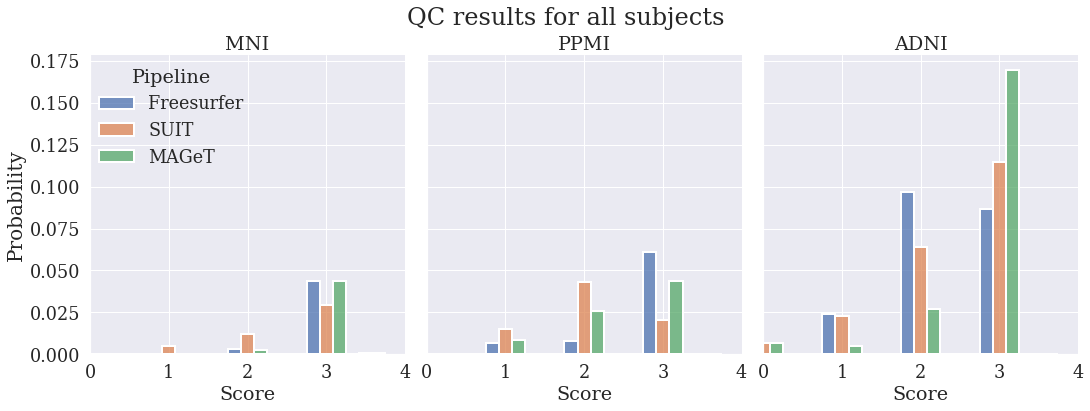

In [5]:
# Visualization of QC results hypothesis testing (no vermis).
# prepare data
save_fig=1

vis_cols = ['cohort', 'freesurfer_score', 'suit_score', 'maget_score'];
def format_dist(df, vis_col_):
    vis_all_df = df.loc[:,vis_cols].copy();
    #vis_all_df.loc[:,'Cohort:Group'] = vis_all_df.loc[:,'cohort']+' : '+vis_all_df.loc[:,'group'];
    vis_all_df.loc[:,['Freesurfer','SUIT','MAGeT']] = np.array(vis_all_df.loc[:,['freesurfer_score','suit_score','maget_score']])
    vis_all_df=vis_all_df.drop(columns=['freesurfer_score','suit_score','maget_score'])
    vis_all_df=pd.melt(vis_all_df, id_vars=['cohort'], value_vars=['Freesurfer', 'SUIT', 'MAGeT'], var_name='Pipeline', value_name='Score')
    return vis_all_df

vis_all_df = format_dist(all_data_df, vis_cols);
vis_qc_df  = format_dist(all_data_qc_df, vis_cols);
vis_all_df.Score=vis_all_df.Score-0.25
vis_qc_df.Score=vis_qc_df.Score-0.25
codes_dir =  Path("/codes")
fig_dir  = codes_dir / "stats" / "figs"

# basic vis setting
figure_size=(18, 6);
legend_font_size='medium'
#C_MAP='coolwarm'; VMIN=-2; VMAX=2; alpha_=0.05
sns.set(font_scale=1.6)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

# viz
titile_str_all = 'QC results for all subjects'
print(titile_str_all)
g1=sns.displot(vis_all_df, x='Score', col='cohort', hue="Pipeline",
               col_order=['MNI', 'PPMI', 'ADNI'], kind="hist", multiple='dodge', stat='probability', binwidth=0.5,
               linewidth=2, fill=True)
# twick
g1.set(xlim=(0, 4))
g1.fig.suptitle(titile_str_all, x=0.45, y=1, fontsize=24)
g1.fig.set_figwidth(figure_size[0])
g1.fig.set_figheight(figure_size[1])
g1.legend.set(bbox_to_anchor=(0.2, 0.68))
g1.set_titles("{col_name}")
g1.axes[0,0].set_ylabel("Probability", fontsize=20)
# Tweak the figure
if save_fig:
    print('saving...');
    g1.savefig((fig_dir/("SI1_"+titile_str_all+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)
else:
    print('figure not saved...')

QC Results
saving...


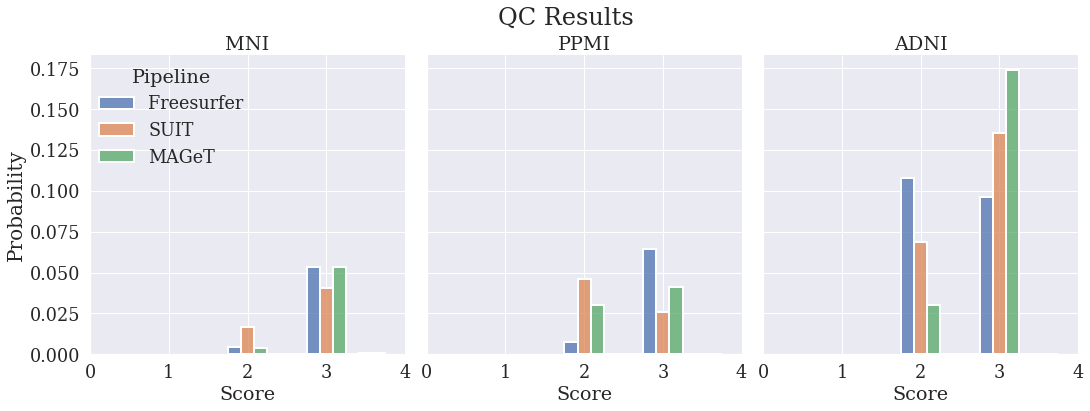

In [6]:
# viz
titile_str = 'QC Results'
print(titile_str)
g2=sns.displot(vis_qc_df, x='Score', col='cohort', hue="Pipeline", 
               col_order=['MNI', 'PPMI', 'ADNI'], kind="hist", multiple='dodge', stat='probability', binwidth=0.5,
               linewidth=2, fill=True)
# twick
g2.set(xlim=(0, 4))
g2.fig.suptitle(titile_str, x=0.45, y=1, fontsize=24)
g2.fig.set_figwidth(figure_size[0])
g2.fig.set_figheight(figure_size[1])
g2.legend.set(bbox_to_anchor=(0.2, 0.68))
g2.set_titles("{col_name}")
g2.axes[0,0].set_ylabel("Probability", fontsize=20)
# Tweak the figure
#g1.set_xlabels(titile_str)
if save_fig:
    print('saving...');
    g2.savefig((fig_dir/("SI1_"+titile_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)
else:
    print('figure not saved...')